In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14,10)

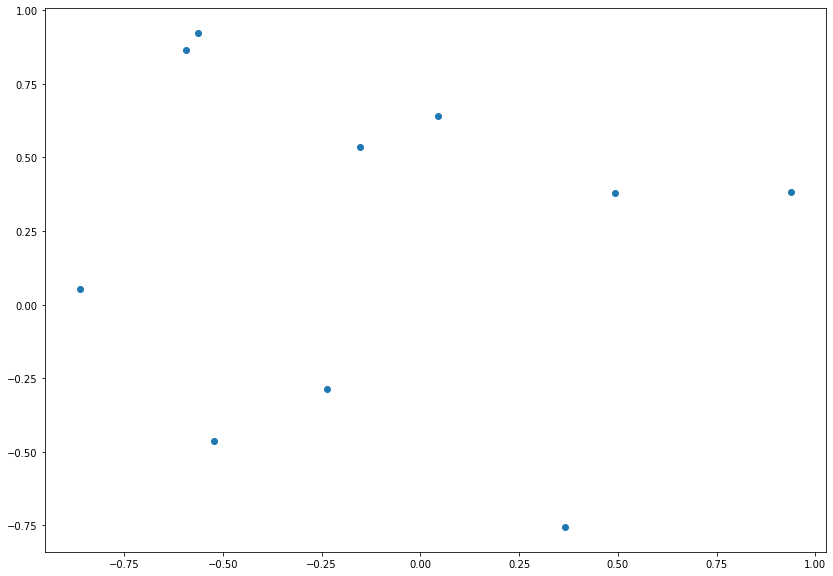

In [6]:
X = np.random.random((10,2))*2-1
plt.scatter(X[:,0],X[:,1], marker='o')

### Тринангуляция Делоне

In [7]:
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d

In [8]:
dln = Delaunay(X)
vor = Voronoi(X)

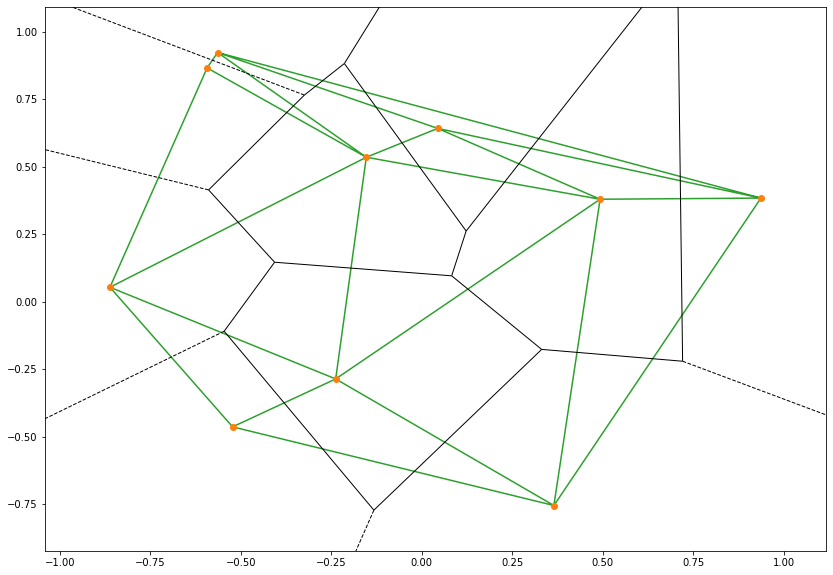

In [9]:
ax = plt.subplot(111)
fig = voronoi_plot_2d(vor, ax=ax, show_vertices=False)
fig = delaunay_plot_2d( dln, ax=ax)

In [10]:
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state =0)

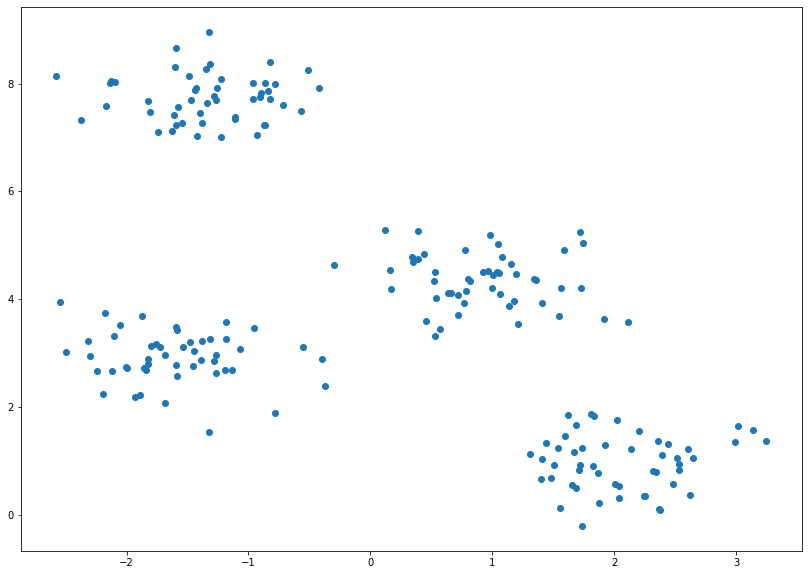

In [12]:
plt.scatter(X[:,0], X[:,1], marker='o')

In [18]:
X1, y1 = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1, shuffle=True, random_state =1)

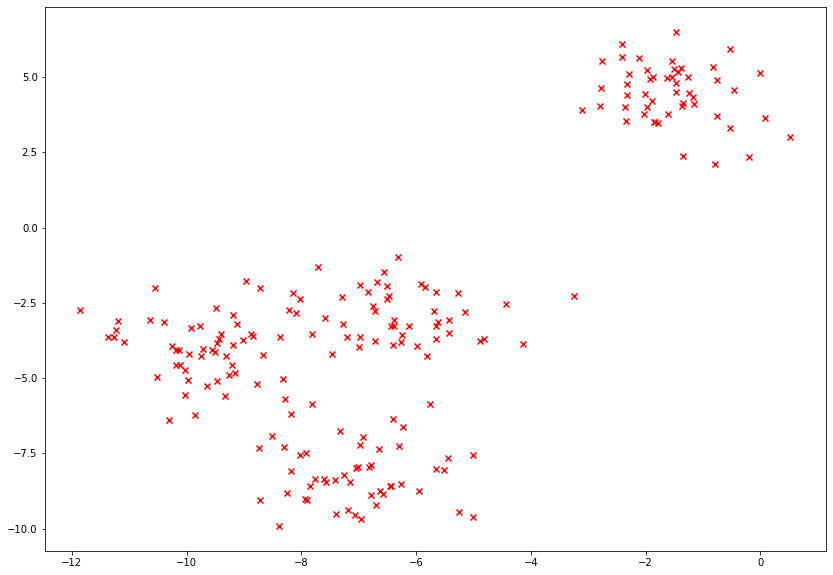

In [19]:
plt.scatter(X1[:,0], X1[:,1], marker='x', color='red')

In [20]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters = 4, init='random', n_init = 10, max_iter=100, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)

In [32]:
np.unique(y_km)

array([0, 1, 2, 3], dtype=int32)

(-1.0, 10.0)

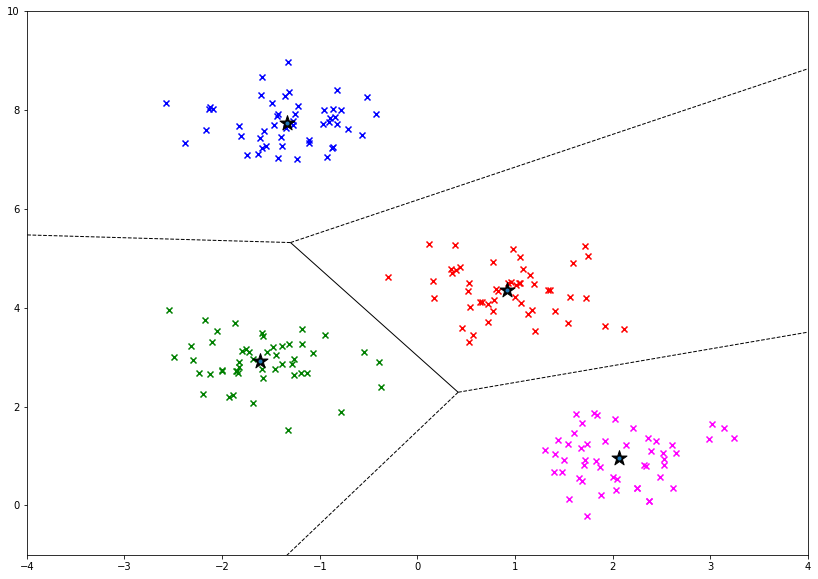

In [48]:
ax = plt.subplot(111)
for lbl, color in zip(np.unique(y_km), ['red','blue','green','magenta']):
    idx = y_km == lbl
    ax.scatter(X[idx,0], X[idx,1], color=color, marker='x')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=250, color='black')
vor = Voronoi(km.cluster_centers_)
fig = voronoi_plot_2d(vor, ax =ax, show_vertices=False)
plt.xlim(-4,4)
plt.ylim(-1,10)

In [34]:
  #опорные точкиkm.cluster_centers_

array([[ 0.91932803,  4.34824615],
       [-1.33173192,  7.7400479 ],
       [-1.60782913,  2.9162828 ],
       [ 2.06911036,  0.96146833]])

(-1.0, 10.0)

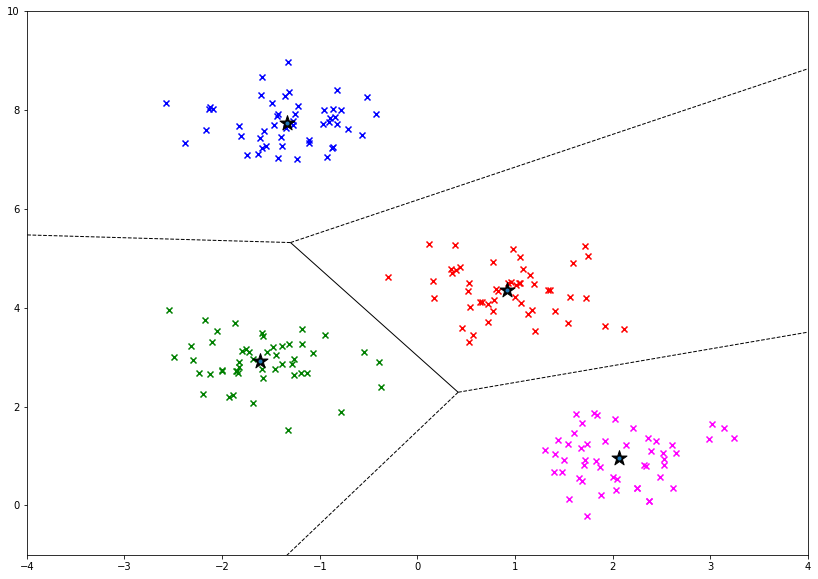

In [58]:
km = KMeans(n_clusters = 4, init='random', n_init = 10, max_iter=100, tol=1e-4, random_state=0)
y_km = km.fit_predict(X)
ax = plt.subplot(111)
for lbl, color in zip(np.unique(y_km), ['red','blue','green','magenta','black','gold','grey']):
    idx = y_km == lbl
    ax.scatter(X[idx,0], X[idx,1], color=color, marker='x')
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=250, color='black')
vor = Voronoi(km.cluster_centers_)
fig = voronoi_plot_2d(vor, ax =ax, show_vertices=False)
plt.xlim(-4,4)
plt.ylim(-1,10)

In [60]:
km.inertia_ # если близится к 1 значит правильно подобрано количество кластеров

94.02242630751765

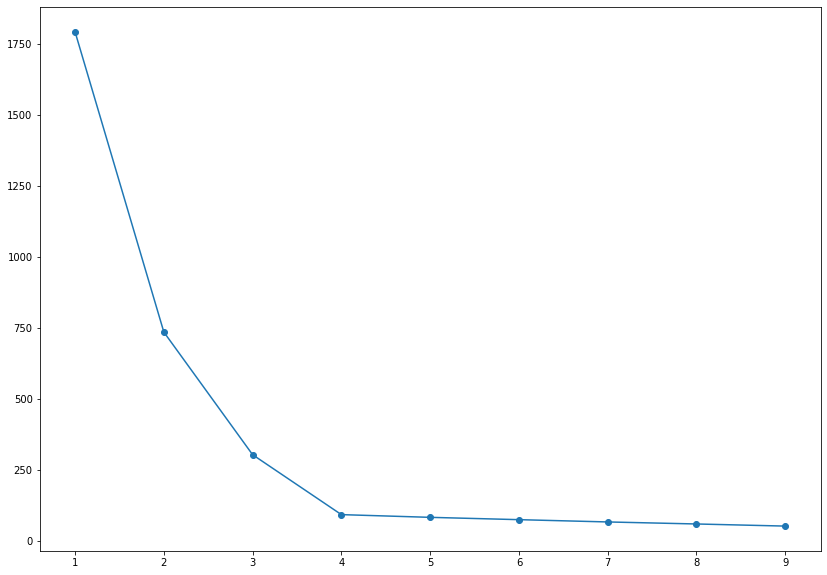

In [64]:
distor = []
for c in range(1, 10):
    km = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(X)
    distor.append(km.inertia_)
plt.plot(range(1,10), distor, marker='o')